In [ ]:
#Calcul des différents Grecques

In [43]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import nbimporter
import sys
sys.path.append('/Users/eugenedupas/Desktop/Code\ Python/PricerOptionsBS.py')
import PricerOptionsBS



In [3]:
start= "2024-05-01"
end= dt.datetime.now()
stock = yf.download("AAPL", start, end)
stock_adj = stock["Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [35]:
e = 10**(-3) #epsilon
S = [ stock_adj.iloc[-1]*(1/2 + i*e) for i in range(int (1/(2*e)))] + [stock_adj.iloc[-1]*(1 + i*e) for i in range(int(1/e))] #asset price (on prend la valeur actuelle et le prix entre /2 ou *2

S

[111.38999938964844,
 111.61277938842774,
 111.83555938720703,
 112.05833938598633,
 112.28111938476563,
 112.50389938354492,
 112.72667938232422,
 112.94945938110352,
 113.17223937988281,
 113.39501937866211,
 113.61779937744141,
 113.8405793762207,
 114.063359375,
 114.2861393737793,
 114.5089193725586,
 114.7316993713379,
 114.95447937011718,
 115.17725936889649,
 115.40003936767579,
 115.62281936645508,
 115.84559936523438,
 116.06837936401368,
 116.29115936279297,
 116.51393936157227,
 116.73671936035157,
 116.95949935913086,
 117.18227935791016,
 117.40505935668946,
 117.62783935546875,
 117.85061935424805,
 118.07339935302736,
 118.29617935180664,
 118.51895935058594,
 118.74173934936525,
 118.96451934814453,
 119.18729934692384,
 119.41007934570314,
 119.63285934448243,
 119.85563934326173,
 120.07841934204103,
 120.30119934082032,
 120.52397933959962,
 120.74675933837891,
 120.96953933715821,
 121.19231933593751,
 121.4150993347168,
 121.6378793334961,
 121.8606593322754,
 122

In [58]:
start= "2024-05-01"
end= dt.datetime.now()
stock = yf.download("AAPL", start, end)
stock_adj = stock["Adj Close"]

#Paramètres
K = 220
T = 1
type = "Put"
r = yf.download("^TNX", start, end)["Adj Close"].iloc[-1]
q = yf.Ticker("AAPL").info.get("dividendYield")
sigma = 0.285


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [59]:
#Calcule le delta de l'option pricer à C selon la celur de l'asset S
def delta(C):
    delta = [ (C[i+1]-C[i])/(S[i+1]-S[i]) for i in range(len(C)-1)]
    print(C[1+1]-C[1])
    return delta

In [60]:
C = [ PricerOptionsBS.black_scholes(i,K,T,r,q,sigma,type) for i in S]
D = delta (C)
D

-0.2177041780107345


[-0.9775278407139264,
 -0.9772159942707335,
 -0.976900187966604,
 -0.9765803951576163,
 -0.97625658932928,
 -0.9759287441018313,
 -0.9755968332325795,
 -0.9752608306208318,
 -0.9749207103100629,
 -0.9745764464926209,
 -0.9742280135130585,
 -0.9738753858717056,
 -0.9735185382277798,
 -0.9731574454035476,
 -0.9727920823880886,
 -0.9724224243388081,
 -0.9720484465878434,
 -0.9716701246430571,
 -0.9712874341926478,
 -0.9709003511079574,
 -0.9705088514474087,
 -0.9701129114592019,
 -0.9697125075845034,
 -0.9693076164617674,
 -0.9688982149285378,
 -0.9684842800256593,
 -0.9680657889997477,
 -0.9676427193068423,
 -0.9672150486157248,
 -0.9667827548089202,
 -0.9663458159892858,
 -0.9659042104796932,
 -0.9654579168277924,
 -0.9650069138080085,
 -0.9645511804254339,
 -0.9640906959173382,
 -0.9636254397573989,
 -0.9631553916570411,
 -0.962680531569244,
 -0.9622008396907941,
 -0.9617162964649649,
 -0.9612268825839169,
 -0.9607325789918588,
 -0.9602333668869897,
 -0.9597292277240734,
 -0.9592201432

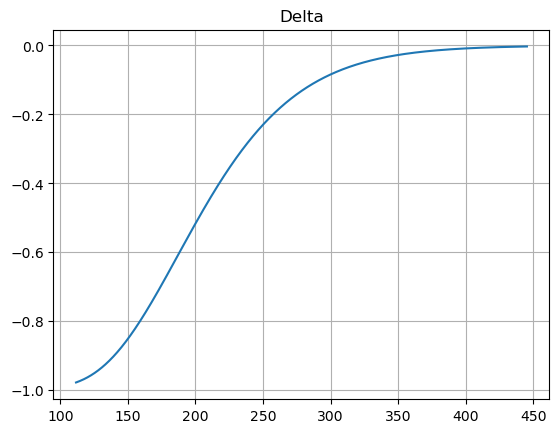

In [61]:
plt.title('Delta')
plt.plot(S[1:],D)
plt.grid(True)
plt.show()